In [2]:
import pystan
import bebi103
import numpy as np
import bokeh.io
import bokeh.plotting
bokeh.io.output_notebook()
import matplotlib.pyplot as plt

%matplotlib notebook

Loading BokehJS ...

In [15]:
behavior_inference_model_code = """
data {
  int N;
  int y[N];
}


parameters {
  real<lower = 0> k;
  vector[N] v;
  vector[N] r;
}


transformed parameters {
  real K = exp(k);
  vector[N] s;
  vector[N] n;
  vector[N] prob;
  
  
  s = r .* exp(-v);
  n = (1 - r) .* exp(-v);
  prob = r * 0.998 + 0.001;
}

model {
  // Priors
  k ~ uniform(0, 5);
  v[1] ~ uniform(0, 5);
  r[1] ~ uniform(0, 1);
  // Likelihood
  print(1, k);
  print(2, v);

  
  for (i in 2:N) {
    v[i] ~ normal(v[i-1], K);
    r[i] ~ beta(s, n);
  }
  print(3, r);
  
  // Likelihood
  y ~ bernoulli(prob);
}
"""

beh_inf = pystan.StanModel(model_code=behavior_inference_model_code)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_4b45ef90a514230a7f03c1a161b9ed09 NOW.


<IPython.core.display.Javascript object>


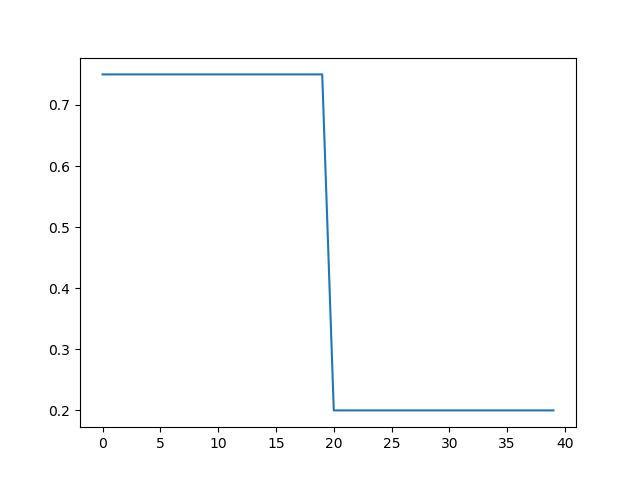

In [10]:
# Generate fake data from the model
# Build the true reward rate
true_prob = [0.75] * 20 + [0.2] * 20
plt.figure()
plt.plot(true_prob)

<IPython.core.display.Javascript object>


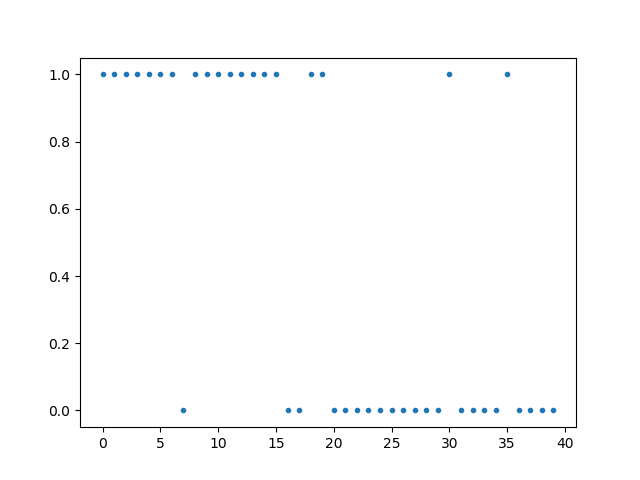

In [12]:
# Generate data from bernoulli
randvars = np.random.random(len(true_prob))
outcomes = randvars < true_prob
plt.figure()
plt.plot(outcomes, '.')
N = len(outcomes)

In [16]:
data_inf = dict(N=N,
               y=outcomes.astype('int'))

#init_prob = [dict(prob=np.ones(N) * 0.1)] * 4
samples_beh_inf = beh_inf.sampling(data=data_inf, warmup=2, iter=2)

RuntimeError: Initialization failed.